<h3>Exploratory analyses</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
from functools import reduce
import statistics
import scipy.stats
import seaborn as sns
import math
import os
import json
import ast
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.bayes_mixed_glm import PoissonBayesMixedGLM
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM

import pingouin as pg
import warnings
from scipy.stats import ttest_rel
#from statannotations.Annotator import Annotator
from scipy.stats import skew
from statsmodels.stats.diagnostic import het_white
from sklearn.preprocessing import PowerTransformer
import statannot
from scipy.stats import ttest_ind
import itertools
from dataclean_func import *
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.copy_on_write = True

In [2]:
task_summary=pd.read_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/dem_vids_task_excluded.csv')
chosen_stim_df=pd.read_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/chosen_stim_excluded.csv')

In [3]:
task_summary

,Unnamed: 0,percentage_correct,mean_perseverative_er,mean_regressive_er,median_till_correct,mean_till_correct,win_stay,lose_shift,timed_out,block_no,...,unspecified,digit_span,prolific_age,prolific_sex,prolific_MH,time taken,self_report_gender,self_report_assigned-at-birth,self_report_age,aligns
0,0,0.716418,1.142857,0.428571,8.0,8.428571,0.951220,0.520000,0,1.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
1,1,0.875000,0.000000,0.285714,6.0,6.142857,1.000000,0.733333,0,2.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
2,2,0.757143,0.714286,0.857143,10.0,9.285714,1.000000,0.739130,0,3.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
3,3,0.753086,0.285714,1.714286,12.0,10.857143,0.947368,0.782609,0,2.0,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
4,4,0.634615,1.000000,3.142857,13.0,13.428571,0.937500,0.641026,0,1.0,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1207,0.758065,0.428571,0.857143,6.0,8.142857,0.954545,0.529412,0,1.0,...,0,7.0,47,Female,Yes,95.150000,Female,Yes,47,True
1016,1208,0.535000,1.571429,9.857143,17.0,25.000000,0.669811,0.483871,1,3.0,...,0,7.0,47,Female,Yes,95.150000,Female,Yes,47,True
1017,1212,0.723577,0.000000,4.000000,12.0,16.714286,0.862500,0.738095,0,3.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True
1018,1213,0.683333,0.714286,3.571429,13.0,15.285714,0.942029,0.780000,0,1.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True


<h3>Looking at overall task performance across blocks (i.e., percentage correct)</h3>

C:\Users\eb08\AppData\Local\Temp\ipykernel_19604\945127270.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'Percentage correct')

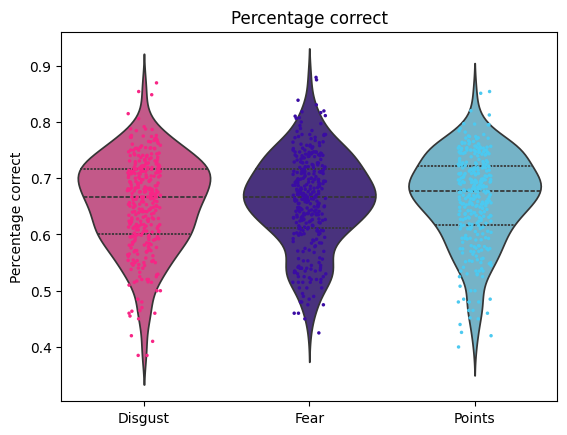

In [4]:
palette = ["#F72585", "#3A0CA3", "#4CC9F0"]

##plot hypothesised results
fig, axes = plt.subplots(1,1, sharey=False)

sns.stripplot(data=task_summary, x="block_type", y="percentage_correct", ax=axes, palette=palette, size=5, jitter=True, marker='.')
sns.violinplot(data=task_summary, x="block_type", y="percentage_correct", ax=axes,fill=True, inner="quart", palette=palette, saturation=0.5)
#axes.set_xlabel("Feedback type")
axes.set_xlabel("")
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
axes.set_ylabel("Percentage correct") 
axes.set_title("Percentage correct")

Percentage correct: -0.49987154559115393


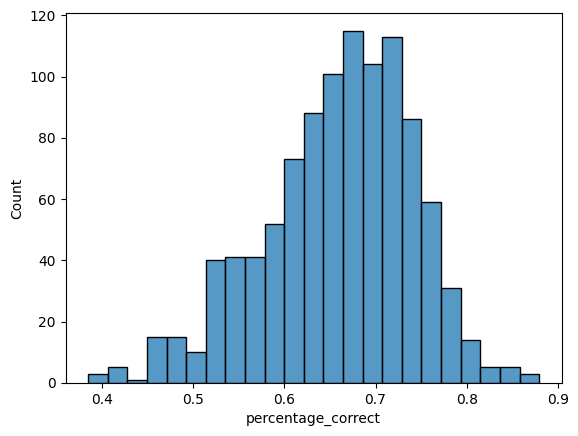

In [5]:
sns.histplot(data=task_summary, x="percentage_correct") 
print('Percentage correct: '+str(skew(task_summary.percentage_correct)))
##no skew (but almost - cut-off was -0.5)

<b>For completion will do model selection as done for planned analyses</b>

In [6]:
data=task_summary.reset_index()

formula = 'percentage_correct ~ block_type'

basic_model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)

u:\Documents\envs\disgust_reversal_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<Axes: xlabel='percentage_correct_transformed', ylabel='Count'>

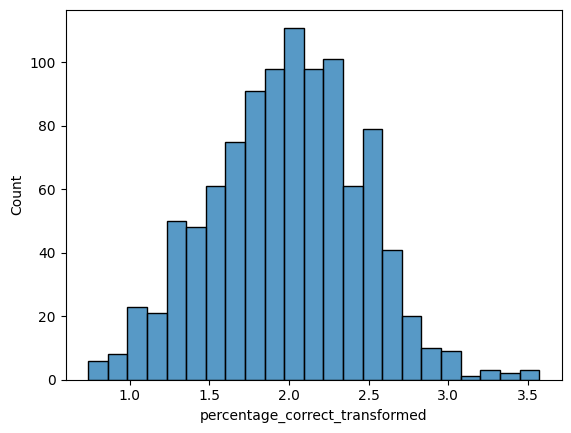

In [7]:
##because it doesn't converge will see if fixing the skew helps
pt=PowerTransformer(method='yeo-johnson', standardize=False)
skl_yeojohnson=pt.fit(pd.DataFrame(task_summary.percentage_correct))
skl_yeojohnson=pt.transform(pd.DataFrame(task_summary.percentage_correct))
task_summary['percentage_correct_transformed'] = pt.transform(pd.DataFrame(task_summary.percentage_correct))
sns.histplot(data=task_summary['percentage_correct_transformed'])

In [8]:
data=task_summary.reset_index()

formula = 'percentage_correct_transformed ~ block_type'

basic_model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)

Test which random effects to include (commenting out models which didn't converge)

   basic_model feedback_randint fractals_randint  feedback_fractals_randint  \
0  1224.203612                                                  1393.567909   

     randslope  feedback_randint_randslope  \
0  1256.302925                  1263.23048   

   feedback_fractals_randint_randslope  
0                          1270.158038  


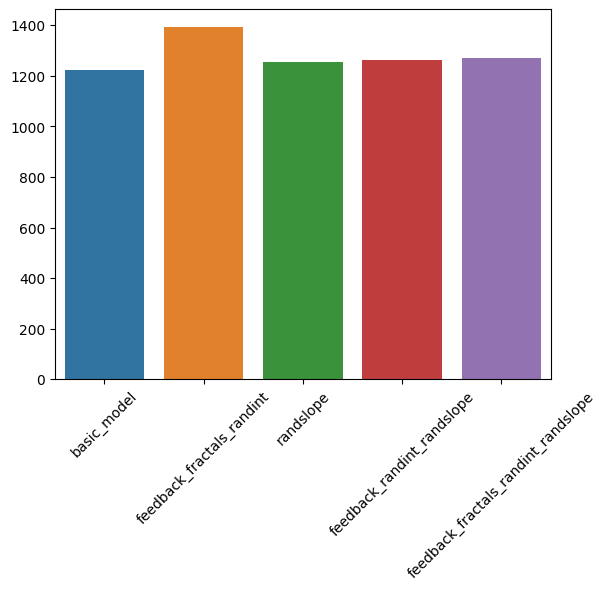

In [10]:
#test which random effects to include
#feedback_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'feedback_details': '0+feedback_details'}).fit(reml=False) 
#fractals_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'fractals': '0+fractals'}).fit(reml=False) 
feedback_fractals_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={"feedback_details": "0 + feedback_details", "fractals": "0 + fractals"}).fit(reml=False)

randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', re_formula='~block_type').fit(reml=False)
feedback_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'feedback_details': '0+feedback_details'}, re_formula='~block_type').fit(reml=False) 
feedback_fractals_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'feedback_details': '0+feedback_details', "fractals": "0 + fractals"}, re_formula='~block_type').fit(reml=False) 


bic=pd.DataFrame({'basic_model': [basic_model.bic], 
                    'feedback_randint': [''], 
                    'fractals_randint': [''],
                    'feedback_fractals_randint': [feedback_fractals_randint.bic], ##added manually
                    'randslope': [randslope.bic],
                    'feedback_randint_randslope':[feedback_randint_randslope.bic],
                    'feedback_fractals_randint_randslope': [feedback_fractals_randint_randslope.bic]})
sns.barplot(bic)
plt.xticks(rotation=45) 
print(bic) ##in this case, basic model is the best

Test which covariates to add

   no_covariate  age_covariate  digit_span_covariate  sex_covariate  \
0   1224.203612    1226.819157           1230.500113    1231.128145   

   digit_span_age_covariate  sex_age_covariate  sex_digit_span_covariate  \
0                1233.50694        1233.746584               1237.425969   

   sex_age_digit_span_covariate  
0                    1240.43227  


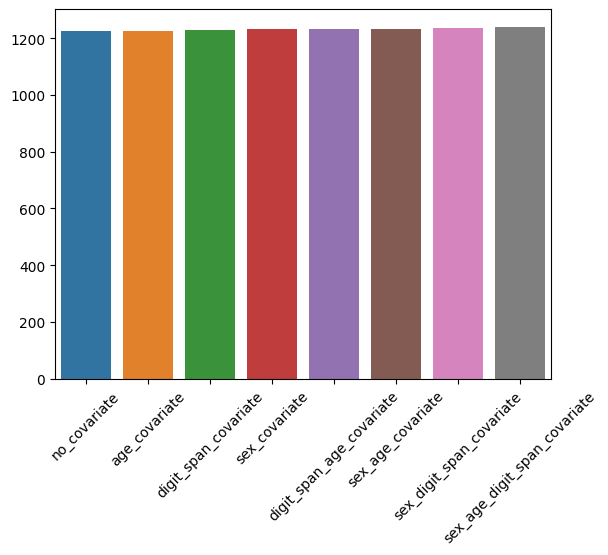

In [11]:
##test which covariates to add -- Using the random effects which were best above (basic model in this case)
no_covariate=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_covariate=smf.mixedlm(formula+str('+prolific_sex'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
age_covariate=smf.mixedlm(formula+str('+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
digit_span_covariate=smf.mixedlm(formula+str('+digit_span'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_age_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_digit_span_covariate=smf.mixedlm(formula+str('+prolific_sex+digit_span'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
digit_span_age_covariate=smf.mixedlm(formula+str('+digit_span+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_age_digit_span_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age+digit_span'), data, groups=data['participant_no'], missing='drop').fit(reml=False)

bic=pd.DataFrame({'no_covariate': [no_covariate.bic], 
                    'sex_covariate': [sex_covariate.bic], 
                    'age_covariate': [age_covariate.bic],
                    'digit_span_covariate': [digit_span_covariate.bic],
                    'sex_age_covariate': [sex_age_covariate.bic],
                    'sex_digit_span_covariate': [sex_digit_span_covariate.bic],
                    'digit_span_age_covariate': [digit_span_age_covariate.bic],
                    'sex_age_digit_span_covariate': [sex_age_digit_span_covariate.bic]})
plt.xticks(rotation=45)
sns.barplot(bic.sort_values(by=0, axis=1))
print(bic.sort_values(by=0, axis=1))  ##in this case, nocovariate is the best

<b>Now use that best fitting model for hypothesis testing </b>

In [12]:
#Hypothesis test using this model (and if no covariate model hadn't won - would run this too)
no_covariate.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:            MixedLM Dependent Variable: percentage_correct_transformed
No. Observations: 1020    Method:             ML                            
No. Groups:       340     Scale:              0.1280                        
Min. group size:  3       Log-Likelihood:     -594.7829                     
Max. group size:  3       Converged:          Yes                           
Mean group size:  3.0                                                       
------------------------------------------------------------------------------
                           Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------------------
Intercept                  1.963      0.025   77.110   0.000    1.913    2.013
block_type[T.Fear]         0.025      0.027    0.924   0.355   -0.028    0.079
block_type[T.Points]       0.047      0.027    1.713   0.087   -0.007    0.101
Group Var                  0.092      0.035                                   
============================================================================

"""

Test the assumptions of this model

In [13]:
#chosen model
results=no_covariate

#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
    ##if test is significant then the assumption is violated
        #is significant here

##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)
    ##again, only violated if you get a significant p value

Statistic 0.9939829017305208
p-value 0.0004039411738375382
LM Statistic 0.8449396257443453
LM-Test p-value 0.6554260394578453
F-Statistic 0.42157647682504173
F-Test p-value 0.6561264053767323


Normality of residuals is violated - so need a generalized mixed effects model
<p>see percentage_correct.ipynb in the exploratory_generalized_mixed effects_model folder
<p>this model finds <b>no effect of block-type</b>. So we can be confident that the decrease in lose-shift is not due to an overall change in task performance on the disgust-block (e.g., due to inattention or increased distraction)

<p>We can test our certainty of this using a Bayes factor</p>

In [14]:
##Bayes factor analysis
def bayes_factor(df, dependent_var, condition_1_name, condition_2_name):
    df=df[(df.block_type==condition_1_name)| (df.block_type==condition_2_name)][[dependent_var, 'block_type', 'participant_no']]
    df.dropna(inplace=True)
    df=df.pivot(index='participant_no', columns='block_type', values=dependent_var).reset_index()
    ttest=pg.ttest(df[condition_1_name], df[condition_2_name], paired=True)
    bf_null=1/float(ttest.BF10)
    return bf_null

In [15]:
bayes_factor(task_summary, 'percentage_correct_transformed', 'Disgust', 'Points')
#effect size of 3 suggests moderate support for the null

3.90625

<h3>Assessing the effect of video ratings on lose-shift result</h3>
<p>In the planned analysis, we assessed whether all hypothesis testing models were affected by differences between <b>fear and disgust</b> detected in the video rating analyses</p>
<p>These analyses were planned in order to assess whether any differences between fear and disgust were driven by any differences in valence and arousal</p>
<br>
<p>However, since no hypothesis testing model found a difference between fear and disgust, instead finding a difference bewteen <b>points and disgust</b> - arguably these video ratings were not the most relevant ones to include.</p>
<p>Instead, it makes more sense to test whether the difference between <b>points and disgust</b> is driven by the differences between <b>points and disgust</b> found in the video rating analyses.</p>
<p>Namely, whether the difference between disgust and points learning (indexed by lose-shift probability) is driven by:
<li>the difference in valence found between points and disgust feedback
<li>the difference in fear rating found between points and disgust
<li>the difference in disgust rating found between points and disgust

In [16]:
chosen_stim_df

,Unnamed: 0,Vid,trial_type,unpleasant_1,unpleasant_2,arousing_1,arousing_2,disgusting_1,disgusting_2,frightening_1,...,unspecified,digit_span,prolific_age,prolific_sex,prolific_MH,time taken,self_report_gender,self_report_assigned-at-birth,self_report_age,aligns
0,0,1414,disgust,6.0,5.0,7.0,7.0,7.0,5.0,1.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
1,1,1202,fear,6.0,6.0,7.0,7.0,1.0,1.0,8.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
2,2,points,points,5.0,NaN,7.0,NaN,0.0,NaN,0.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
3,3,0046,fear,4.0,3.0,4.0,5.0,1.0,1.0,5.0,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
4,4,points,points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1207,1987,disgust,7.0,7.0,7.0,7.0,8.0,8.0,6.0,...,0,7.0,47,Female,Yes,95.150000,Female,Yes,47,True
1016,1208,0374,fear,7.0,8.0,8.0,7.0,3.0,6.0,8.0,...,0,7.0,47,Female,Yes,95.150000,Female,Yes,47,True
1017,1212,1202,fear,3.0,1.0,7.0,6.0,0.0,0.0,8.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True
1018,1213,1414,disgust,6.0,7.0,6.0,6.0,6.0,8.0,1.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True


In [17]:
##due to error some don't have points values - so will have to exclude them
participants_to_remove=list(set(chosen_stim_df[chosen_stim_df.unpleasant_1.isna()].participant_no))
chosen_stim_df_short=chosen_stim_df[~chosen_stim_df['participant_no'].isin(participants_to_remove)]
task_summary_short=task_summary[~task_summary['participant_no'].isin(participants_to_remove)]

In [18]:
stim_ratings_covariates=pd.DataFrame()
block_feedback=pd.DataFrame()
for participant_no in set(chosen_stim_df_short.participant_no):
    participant_df=chosen_stim_df_short[chosen_stim_df_short.participant_no==participant_no]
    disgust=participant_df[participant_df.trial_type=="disgust"]
    points=participant_df[participant_df.trial_type=="points"]
    valence_diff=int(points.unpleasant_1)-int(disgust.unpleasant_1)
    disgust_diff=int(points.disgusting_1)-int(disgust.disgusting_1)
    fear_diff=int(points.frightening_1)-int(disgust.frightening_1)

    
    row=pd.DataFrame({
        'participant_no': [participant_no],
        'points_valence_diff': [valence_diff],
        'points_disgust_diff': [disgust_diff],
        'points_fear_diff': [fear_diff]
    })
    stim_ratings_covariates=pd.concat([stim_ratings_covariates, row])

First step - show that the original effect remains in this slightly smaller sample
<p>As some individuals were not asked to rate the points feedback due to an error in the task code

In [19]:
data=pd.merge(task_summary_short, stim_ratings_covariates, on='participant_no', how='outer')
formula = 'lose_shift ~ block_type + prolific_age'
results=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(results.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   lose_shift
No. Observations:   774       Method:               ML        
No. Groups:         258       Scale:                0.0086    
Min. group size:    3         Log-Likelihood:       506.1864  
Max. group size:    3         Converged:            Yes       
Mean group size:    3.0                                       
--------------------------------------------------------------
                     Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.584    0.027 21.616 0.000  0.531  0.637
block_type[T.Fear]   0.008    0.008  0.991 0.322 -0.008  0.024
block_type[T.Points] 0.024    0.008  2.935 0.003  0.008  0.040
prolific_age         0.001    0.001  2.273 0.023  0.000  0.002
Group Var            0.015    0.021                           



And assumptions are not violated

In [20]:
#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)
for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

Statistic 0.9968560320035522
p-value 0.13431948228636714
LM Statistic 9.649873076065337
LM-Test p-value 0.14019220110754563
F-Statistic 1.6138879266252484
F-Test p-value 0.14029116748449807


Firstly, add difference in points valence to this model

In [22]:
formula = 'lose_shift ~ block_type + prolific_age + points_valence_diff'
results=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(results.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   lose_shift
No. Observations:   774       Method:               ML        
No. Groups:         258       Scale:                0.0086    
Min. group size:    3         Log-Likelihood:       506.5363  
Max. group size:    3         Converged:            Yes       
Mean group size:    3.0                                       
--------------------------------------------------------------
                     Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.584    0.027 21.652 0.000  0.531  0.637
block_type[T.Fear]   0.008    0.008  0.991 0.322 -0.008  0.024
block_type[T.Points] 0.024    0.008  2.935 0.003  0.008  0.040
prolific_age         0.001    0.001  2.354 0.019  0.000  0.002
points_valence_diff  0.003    0.003  0.837 0.402 -0.004  0.009
Group Var            0.015    0.021                           



In [23]:
#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)
for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

Statistic 0.996875766121291
p-value 0.13768605101460607
LM Statistic 15.003047295227848
LM-Test p-value 0.18235746548695933
F-Statistic 1.3693098501100363
F-Test p-value 0.1823464541373501


See if adding disgust difference has an effect

In [24]:
formula = 'lose_shift ~ block_type + prolific_age + points_disgust_diff'
results=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(results.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   lose_shift
No. Observations:    774       Method:               ML        
No. Groups:          258       Scale:                0.0086    
Min. group size:     3         Log-Likelihood:       506.2876  
Max. group size:     3         Converged:            Yes       
Mean group size:     3.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.579    0.029 19.954 0.000  0.522  0.636
block_type[T.Fear]    0.008    0.008  0.991 0.322 -0.008  0.024
block_type[T.Points]  0.024    0.008  2.935 0.003  0.008  0.040
prolific_age          0.001    0.001  2.182 0.029  0.000  0.002
points_disgust_diff  -0.001    0.003 -0.450 0.653 -0.008  0.005
Group Var             0.015    0.021                 

In [25]:
#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)
for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

Statistic 0.9968587635300259
p-value 0.13478081560871702
LM Statistic 13.99286803812323
LM-Test p-value 0.23338836965430107
F-Statistic 1.275414519947943
F-Test p-value 0.2338896211450073


And also fear ratings

In [26]:
formula = 'lose_shift ~ block_type + prolific_age + points_fear_diff'
results=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(results.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   lose_shift
No. Observations:   774       Method:               ML        
No. Groups:         258       Scale:                0.0086    
Min. group size:    3         Log-Likelihood:       506.2015  
Max. group size:    3         Converged:            Yes       
Mean group size:    3.0                                       
--------------------------------------------------------------
                     Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.583    0.028 20.893 0.000  0.528  0.638
block_type[T.Fear]   0.008    0.008  0.991 0.322 -0.008  0.024
block_type[T.Points] 0.024    0.008  2.935 0.003  0.008  0.040
prolific_age         0.001    0.001  2.258 0.024  0.000  0.002
points_fear_diff     0.001    0.004  0.174 0.862 -0.007  0.008
Group Var            0.015    0.021                           



In [27]:
#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)
for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

Statistic 0.9968608235660454
p-value 0.13512972404044749
LM Statistic 11.034426462481596
LM-Test p-value 0.44038365643170174
F-Statistic 1.0018601644139105
F-Test p-value 0.4427627079625978
